# Samrath Singh - AI/ML Showcase

Hi! I'm **Samrath**, a Software Engineering student at the University of Waterloo.  
I'm passionate about the intersection of **computer science and neuroscience**, and in this notebook I’ll showcase how to use a **pretrained deep learning model** for **semantic image segmentation**.

Semantic segmentation means classifying every pixel of an image into categories like "person", "dog", "car", etc.  
Here, I’ll use **DeepLabV3 (ResNet-101 backbone)**, a state-of-the-art convolutional neural network available in PyTorch’s `torchvision` library.

In [14]:
# Install dependencies (only runs if missing)
# The "--quiet" flag keeps the output cleaner
%pip install --quiet torch torchvision matplotlib pillow requests

Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Libraries

We’ll use:
- **PyTorch + torchvision** → for pretrained DeepLabV3  
- **PIL** → to handle images  
- **Matplotlib** → to visualize results  
- **Requests** → to fetch images online

In [15]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

## Step 2: Load Pretrained Model

Here, we load **DeepLabV3 with a ResNet-101 backbone**, pretrained on the **COCO dataset**.  
This model knows how to segment objects like people, dogs, cars, and more — no training required.

In [16]:
# Load pretrained DeepLabV3 model (trained on COCO dataset)
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


## Step 3: Define Helper Functions

- **Preprocessing:** Resize + normalize the image for the model.  
- **Segmentation function:** Run model inference and extract pixel labels.  
- **Visualization function:** Show original + segmentation side by side.

In [17]:
# Preprocessing transform for input images
preprocess = transforms.Compose([
    transforms.Resize((520, 520)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

def get_segmentation(image):
    """Run DeepLabV3 on an image and return the segmentation mask"""
    input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        output = model(input_tensor)['out'][0]  # Raw output
    mask = output.argmax(0).byte().cpu().numpy()
    return mask

def show_side_by_side(original, mask, title1="Original", title2="Segmentation"):
    """Display original image and segmentation mask side-by-side"""
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(mask, cmap="tab20")  # Colorful mask
    plt.title(title2)
    plt.axis("off")

    plt.show()


## Step 4: Load Example Images

I’ll use:
1. A dog (classic computer vision example).  
2. A car, specifically a Tesla Model S (more complex segmentation).  
We’ll fetch them directly from the web.

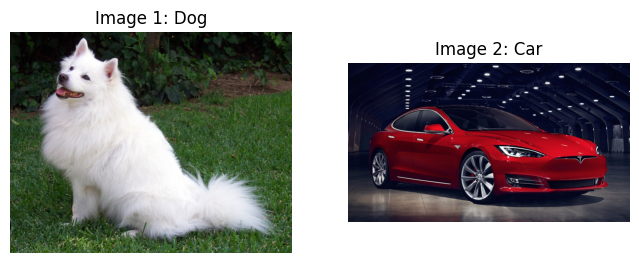

In [18]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Images
url1 = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"
url2 = "https://ev-database.org/img/auto/Tesla_Model_S_2016/Tesla_Model_S_2016-01@2x.jpg"

image1 = Image.open(requests.get(url1, stream=True).raw).convert("RGB")
image2 = Image.open(requests.get(url2, stream=True).raw).convert("RGB")

# Display originals
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.title("Image 1: Dog")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image2)
plt.title("Image 2: Car")
plt.axis("off")

plt.show()


## Step 5: Apply Semantic Segmentation

Now we’ll run both images through **DeepLabV3** to get pixel-wise predictions,  
then visualize the **original vs. segmented** outputs.

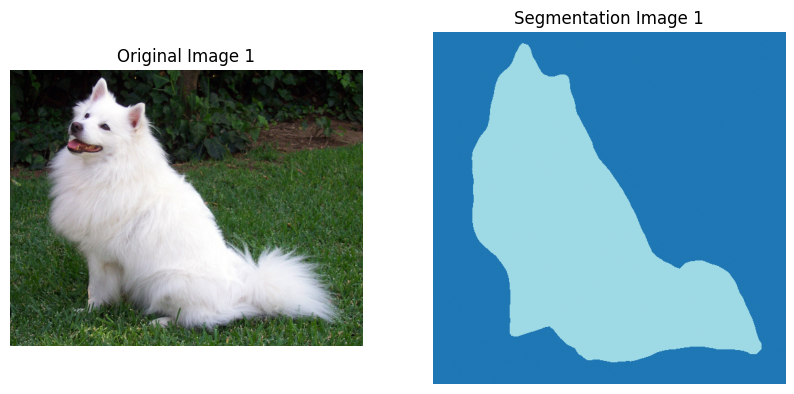

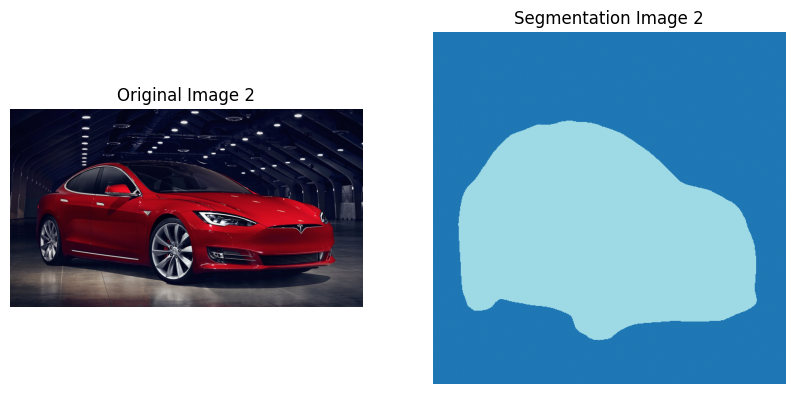

In [19]:
# Run model inference
mask1 = get_segmentation(image1)
mask2 = get_segmentation(image2)

# Display results
show_side_by_side(image1, mask1, "Original Image 1", "Segmentation Image 1")
show_side_by_side(image2, mask2, "Original Image 2", "Segmentation Image 2")
